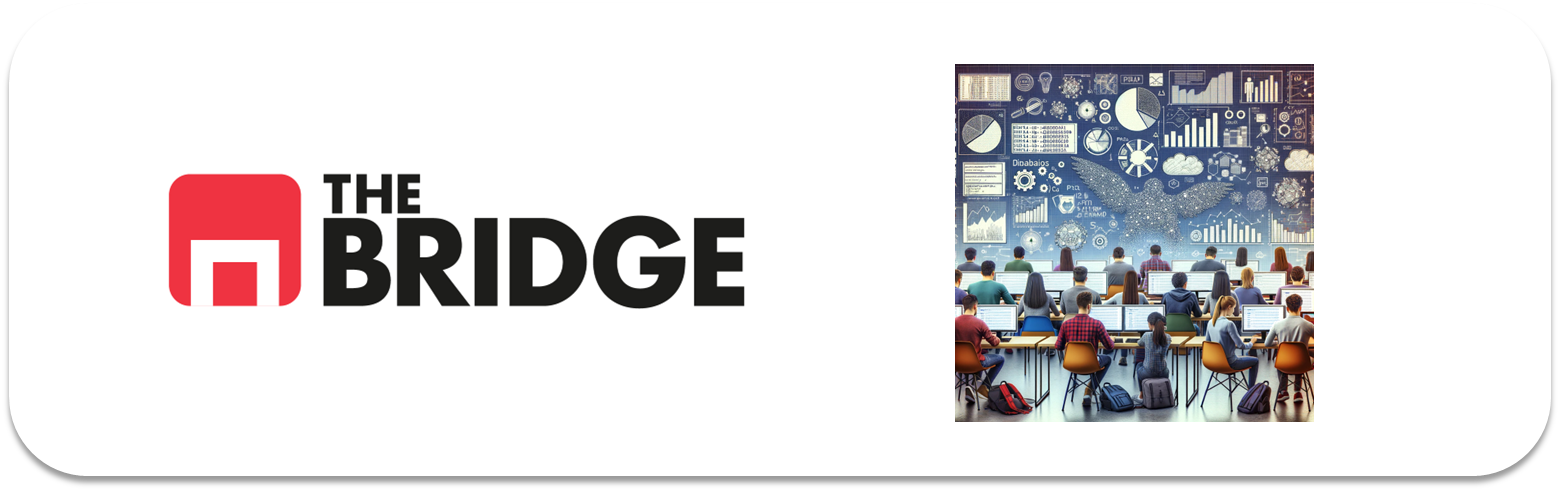

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay


df_titanic = pd.read_csv("./data/titanic.csv")

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



### Modelar la supervivencia en el Titanic

### Limpia

In [163]:
df_titanic.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [164]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [165]:
df_titanic.rename(columns = {'survived': 'target'}, inplace=True)

<Axes: xlabel='target', ylabel='count'>

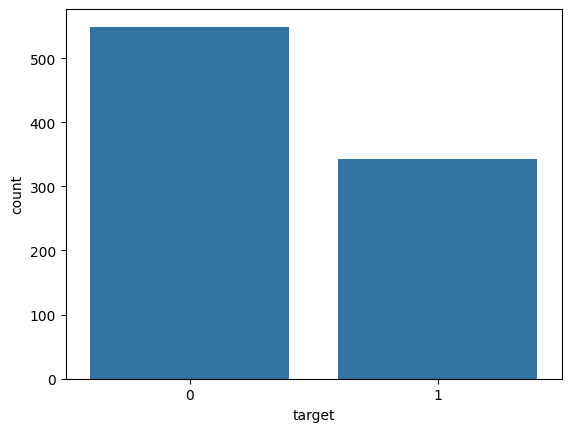

In [166]:
sns.countplot(data=df_titanic, x='target')

<Axes: xlabel='target', ylabel='count'>

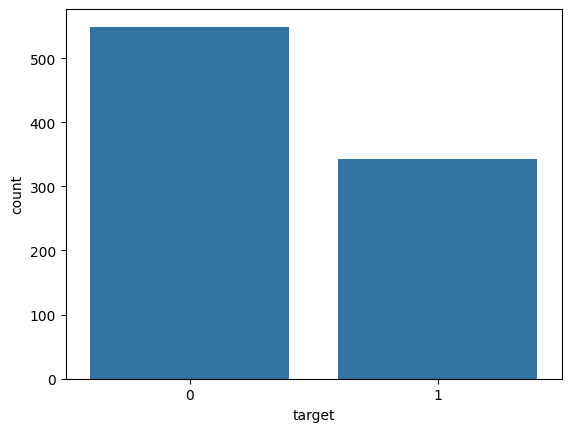

In [167]:
sns.countplot(data=df_titanic, x='target')

In [168]:
df_titanic.drop(['deck', 'embark_town', 'sex', 'alive', 'adult_male', 'class'], axis=1, inplace=True)

df_titanic['embarked'] = df_titanic['embarked'].astype('category')
df_titanic['embarked'] = df_titanic['embarked'].cat.codes
df_titanic['who'] = df_titanic['who'].astype('category')
df_titanic['who'] = df_titanic['who'].cat.codes
df_titanic['alone'] = df_titanic['alone'].astype(int)

In [169]:
df_titanic.dropna(inplace=True)

### Dividimos en train y test

In [170]:
train_set, test_set = train_test_split(df_titanic, test_size= 0.20, stratify= df_titanic['target'], random_state= 42)


### mini-EDA

In [171]:
df_eda = train_set.copy()
df_eda["target"] = y_train.copy()

In [172]:
corr = np.abs(df_eda.corr(numeric_only=True)['target']).sort_values(ascending=False)
bad_corr_feat = corr[corr < 0.07].index.values
df_eda.drop(columns=bad_corr_feat, inplace=True)

In [173]:
np.abs(df_eda.corr(numeric_only=True)['target']).sort_values(ascending=False)

target      1.000000
pclass      0.364898
who         0.312624
fare        0.258337
embarked    0.211847
alone       0.208039
parch       0.102958
age         0.088252
Name: target, dtype: float64

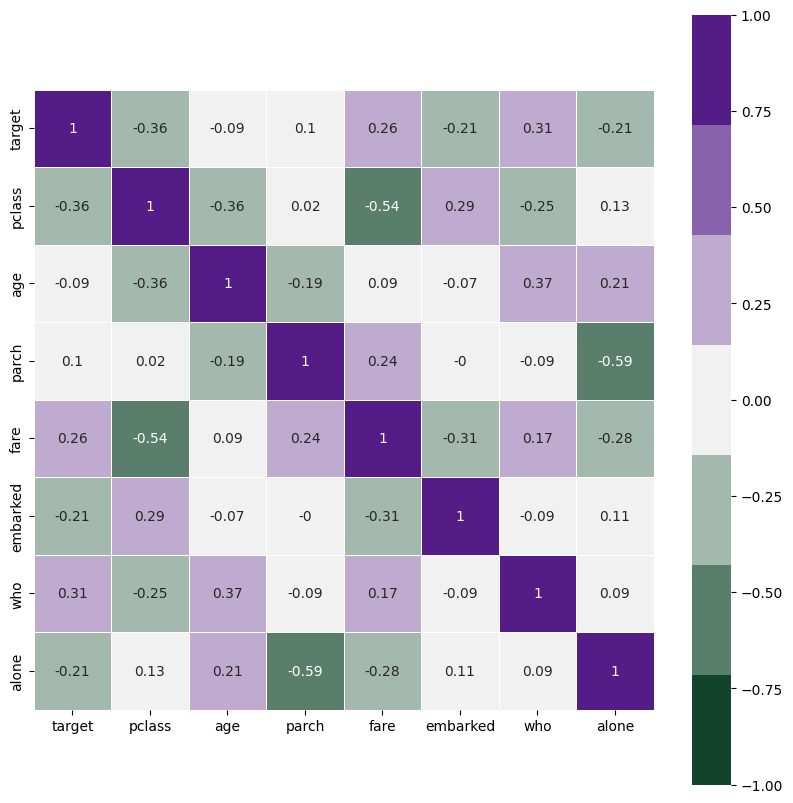

In [174]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(numeric_only=True), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

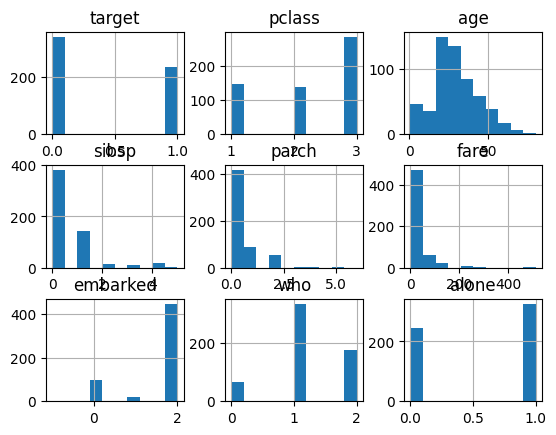

In [175]:
train_set.hist();

In [155]:
train_set.describe()

,target,pclass,age,sibsp,parch,fare,embarked,who,alone
count,571.000000,571.000000,571.000000,571.000000,571.000000,565.000000,571.000000,571.000000,571.000000
mean,0.406305,2.239930,29.332452,0.513135,0.439580,1.048770,1.607706,1.189142,0.572680
std,0.491573,0.837844,14.489701,0.953895,0.867205,0.295926,0.774739,0.617824,0.495123
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.475885,-1.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,0.735091,2.000000,1.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,1.016378,2.000000,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,1.237333,2.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,1.830815,2.000000,2.000000,1.000000


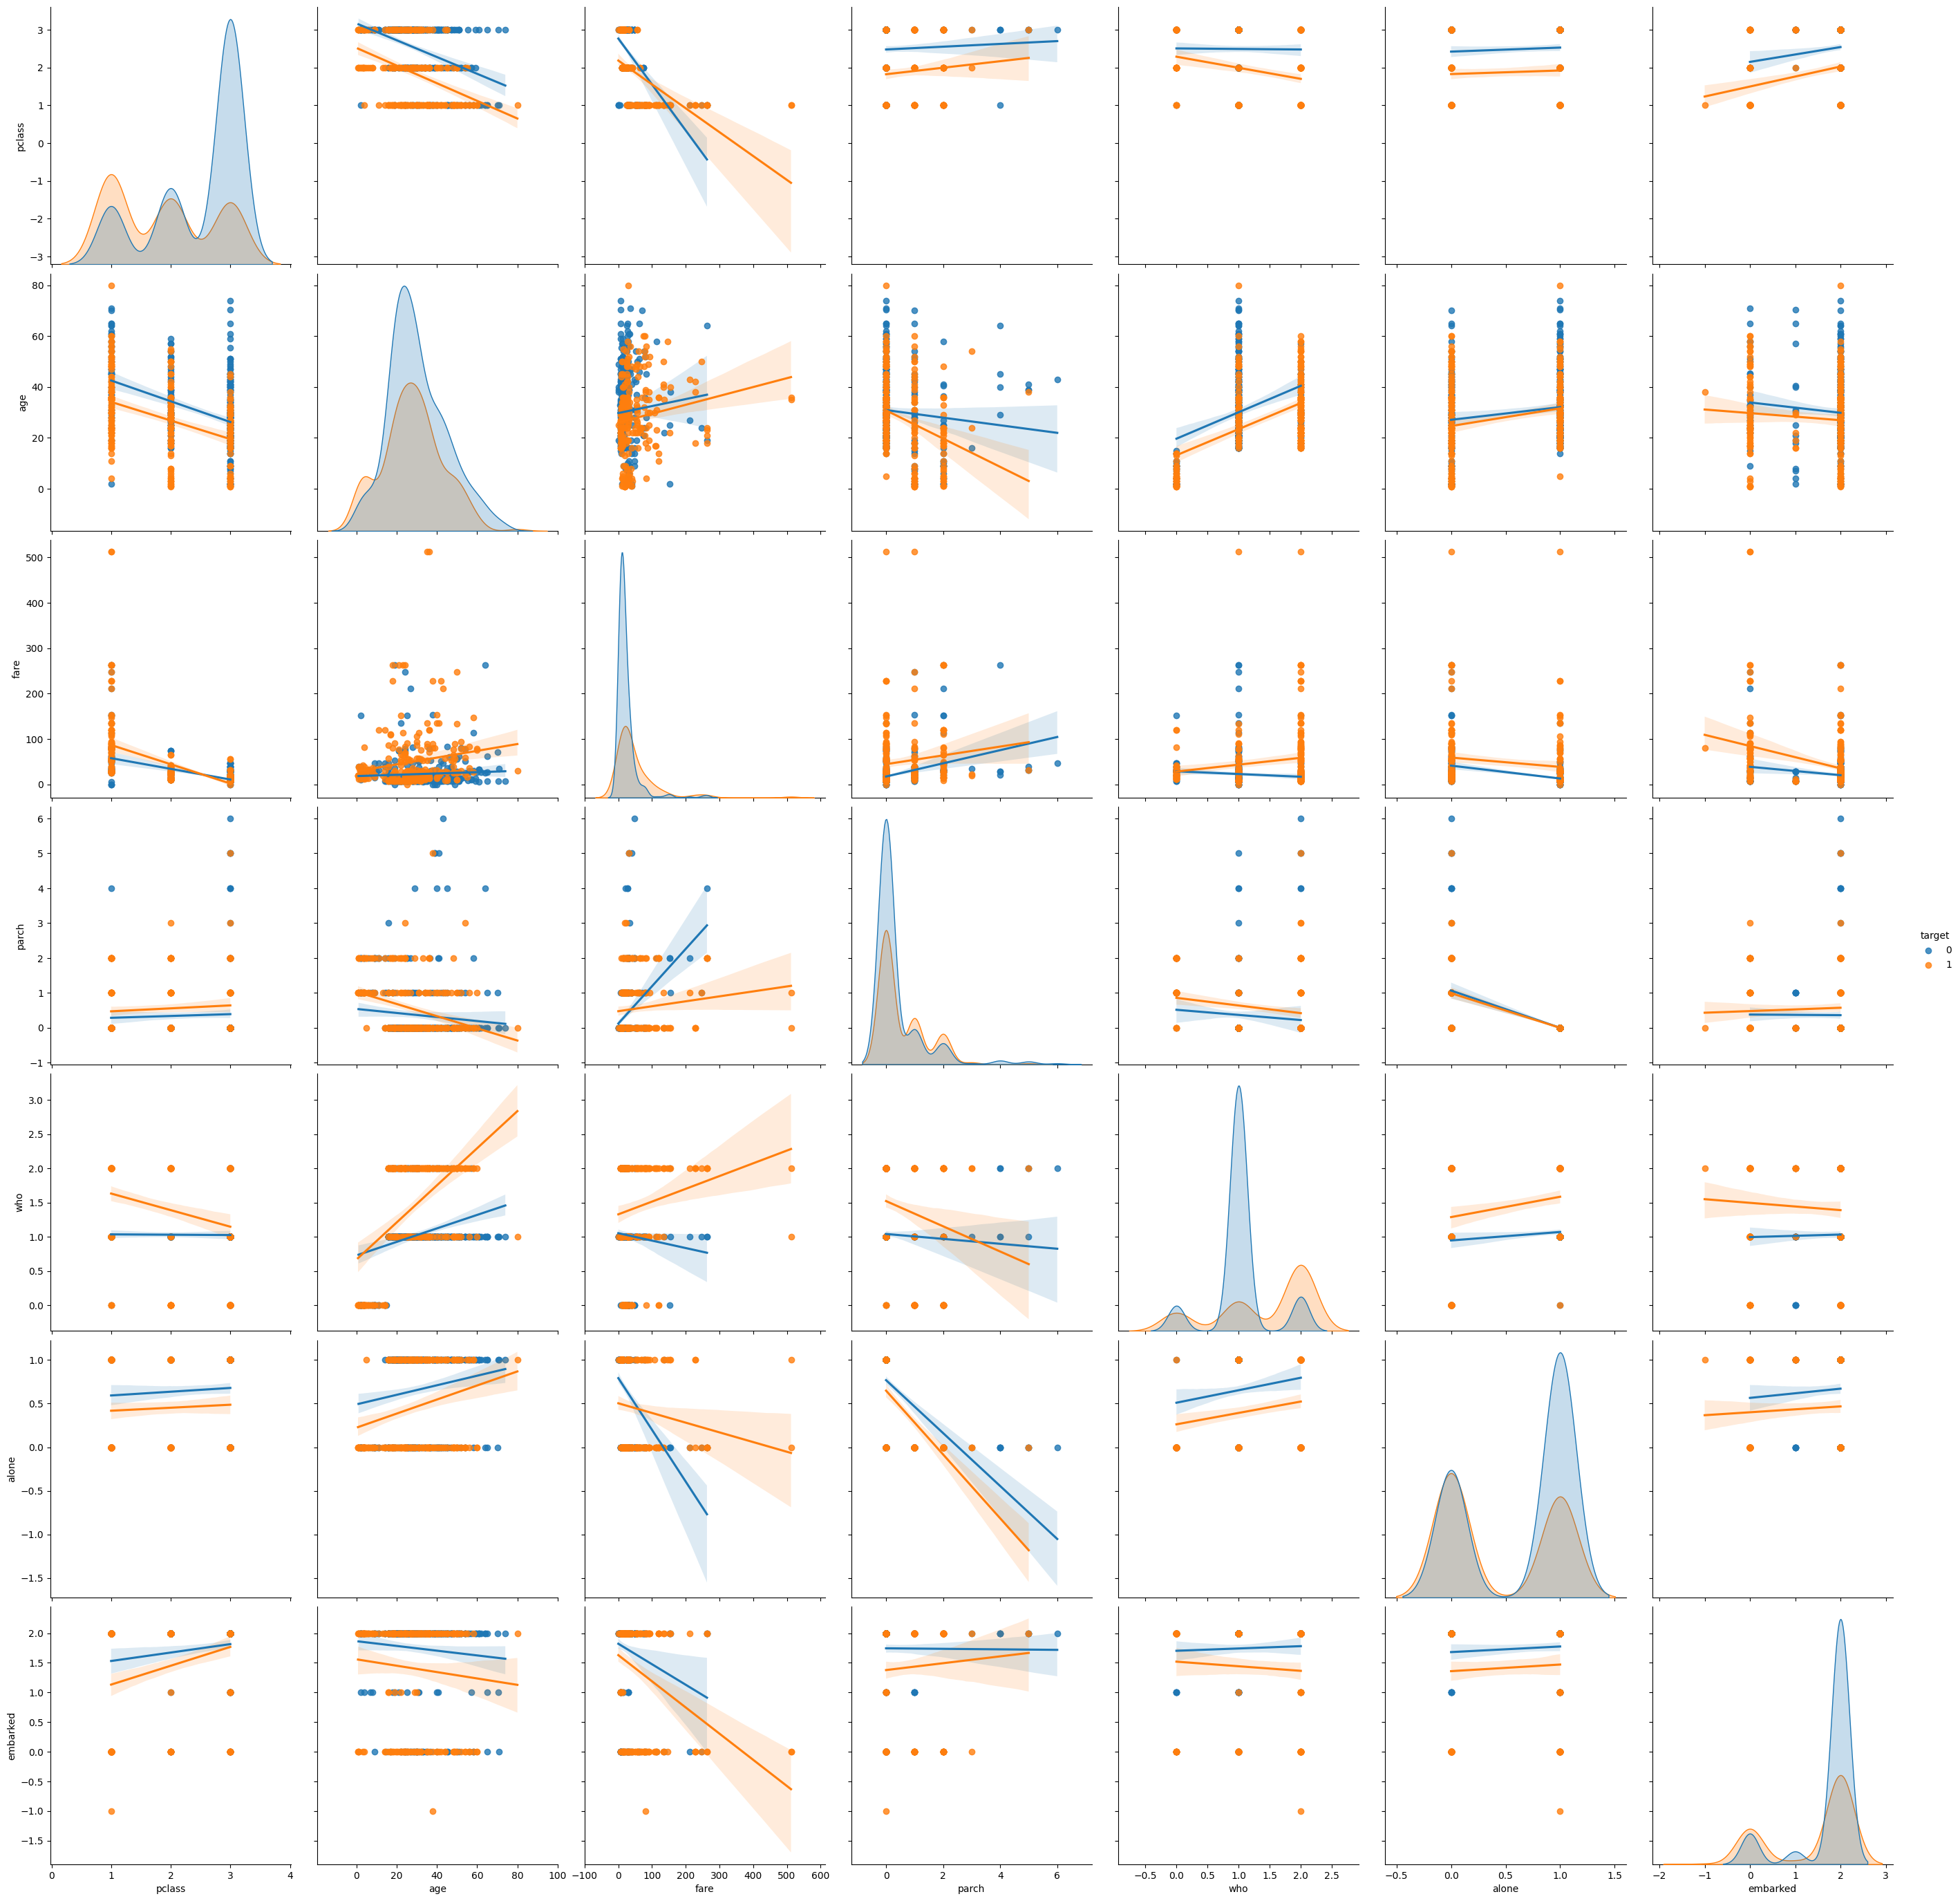

In [176]:
sns.pairplot(train_set,
            hue='target',
            height=4,
            vars=['pclass', 'age', 'fare', 'parch' ,'who', 'alone', 'embarked'],
            kind='reg'); # "reg" de regresión lineal

In [178]:
features = ['pclass',  'age', 'fare']
train_set[features]

,pclass,age,fare
619,2,26.0,10.5000
622,3,20.0,15.7417
72,2,21.0,73.5000
339,1,45.0,35.5000
513,1,54.0,59.4000
...,...,...,...
193,2,3.0,26.0000
604,1,35.0,26.5500
852,3,9.0,15.2458
735,3,28.5,16.1000


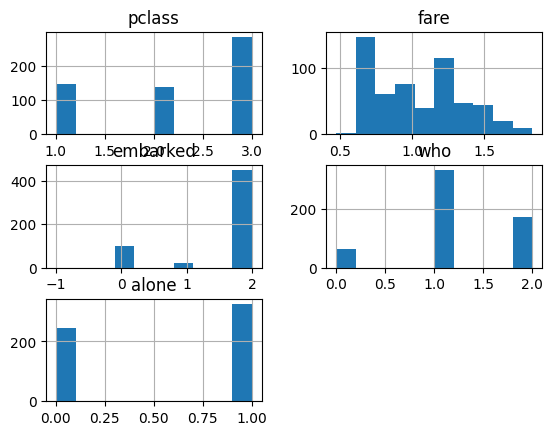

In [146]:
train_set['fare'] = train_set['fare'].apply(np.log)
train_set[features].hist();

### Modelo de regresión logística

In [179]:
scaler = StandardScaler()
scaler.fit(train_set[features])
X_train = pd.DataFrame(scaler.transform(train_set[features]), columns = features)
X_test = pd.DataFrame(scaler.transform(test_set[features]), columns= features)
X_train.describe()

,pclass,age,fare
count,5.710000e+02,5.710000e+02,5.710000e+02
mean,6.221915e-17,-2.239890e-16,-1.073280e-16
std,1.000877e+00,1.000877e+00,1.000877e+00
min,-1.481204e+00,-1.974334e+00,-6.516030e-01
25%,-1.481204e+00,-6.446396e-01,-4.959412e-01
50%,-2.866172e-01,-9.203918e-02,-3.472078e-01
75%,9.079697e-01,5.987113e-01,-4.684237e-02
max,9.079697e-01,3.499863e+00,9.255240e+00


In [180]:
y_train = train_set['target']
y_test = test_set['target']

In [181]:
y_train = train_set['target']
y_test = test_set['target']

In [182]:
log_reg = LogisticRegression(max_iter = 15000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,15000
,multi_class,'deprecated'


In [184]:
log_reg.coef_

array([[-0.97695595, -0.60786279,  0.12582131]])

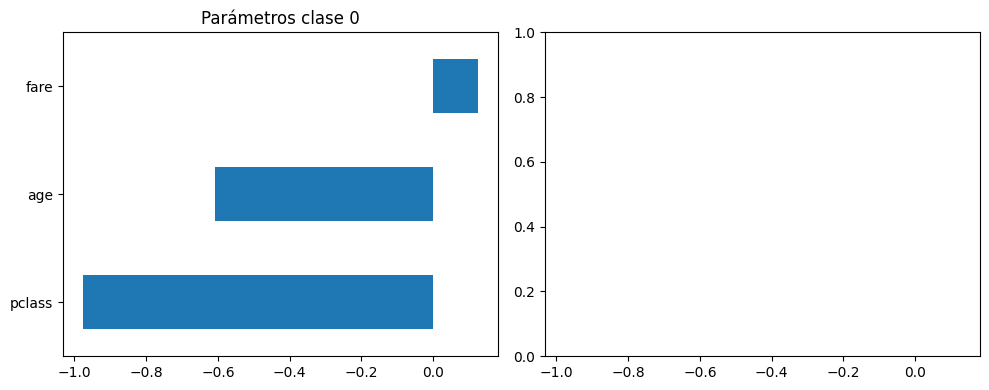

In [192]:
df_coefs = pd.DataFrame(log_reg.coef_, columns=X_train.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

In [195]:
acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(acc_train)

0.7110332749562172


### Validamos el modelo

In [199]:
name='Logistic Regression'
cv_results = model_selection.cross_val_score(log_reg, X_train, y_train, cv=10, scoring='accuracy') 

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.68965517 0.70175439 0.64912281 0.75438596 0.68421053 0.70175439
 0.71929825 0.75438596 0.73684211 0.71929825]
Logistic Regression: 0.711071 (0.031214)


Sale tambien 71% como train

In [202]:
##Evaluacion
y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

In [205]:
#matrix de confusion
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in log_reg.classes_], 
                  columns=[f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,70,15
Real 1,29,29


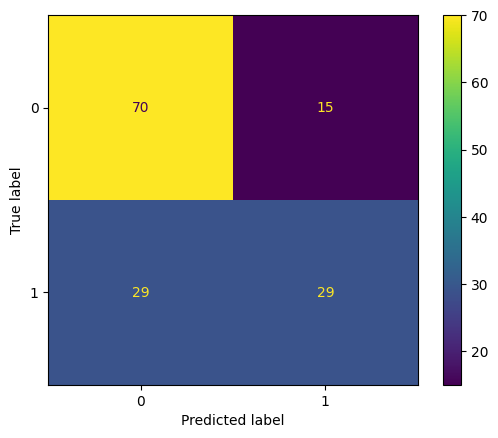

In [207]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

C:\Users\lupev\AppData\Local\r-miniconda\envs\jupyter-env\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


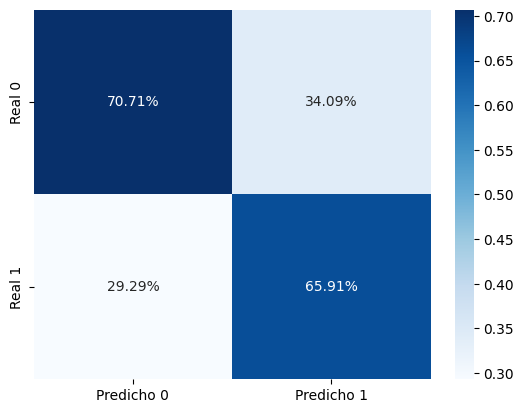

In [208]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [211]:
#metricas
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", np.round(micro_prec, 2))

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", np.round(macro_prec,2))

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", np.round(micro_rec,2))

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", np.round(macro_rec,2))

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", np.round(micro_acc,2))

MICRO PRECISION: 0.69
MACRO PRECISION: 0.68
MICRO RECALL: 0.69
MACRO RECALL: 0.66
MICRO ACCURACY: 0.69


In [212]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 69.23 %
Error: 30.77 %


In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        85
           1       0.66      0.50      0.57        58

    accuracy                           0.69       143
   macro avg       0.68      0.66      0.66       143
weighted avg       0.69      0.69      0.68       143

